<a href="https://colab.research.google.com/github/RahulSinghWaldia/IRISH-DATASET/blob/main/IRISH_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us start by importing some important basic libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#Import iris dataset
df=pd.read_csv(r'/content/sample_data/Iris_Data.csv')


Let us view the data frame.



In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



If there are any missing values, then modify them before using the dataset. For modifying you can use the fillna() method. It will fill null values.

In [5]:
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We can see that all values are 0. It means that there are no null values over the entire data frame.

To view the column names in the data frame, use columns



In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

View the statistical description of the dataset

It contains variables like count, mean, standard deviation, minimum value, maximum value, and percentiles of all the columns such as Id, Sepal length, sepal width, petal length, and petal width. Use describe() method to view it.

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Visualizations

View the count plot of species feature using seaborn.

In [11]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

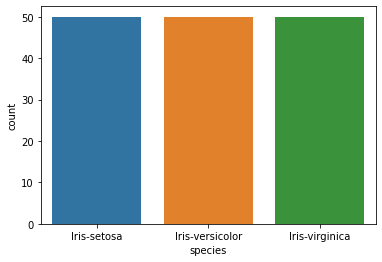

In [12]:
sns.countplot(df['species']);

We have 150 rows in which 50 belong to Iris-setosa, 50 belong to Iris-Versicolor, and the remaining 50 belong to Iris_virginica.


Define x and y. x contains all the input variables such as independent features, and y should contain the dependent variable which is dependent on independent variables, the output.



In [13]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [14]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

We can see x contains all the columns except the last column which is a dependent column and y is this dependent feature.

Split the Data Into Train and Test Datasets

To train the model and next test the model we have to split the entire dataset into train and test sets. In that, the training dataset is used to train the model and the test dataset is to test the model which has been trained with the training dataset.

Import train_test_split to split the data into train and test datasets.

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

View their shapes. Use the shape method to view.

In [17]:
x_train.shape

(112, 4)

In [18]:
x_test.shape

(38, 4)

In [19]:
y_train.shape

(112,)

In [20]:
y_test.shape

(38,)

Create the Model (Classification)

So here we are going to classify the Iris flowers dataset using logistic regression. For creating the model, import LogisticRegression from the sci-kit learn library.



In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Now train the model using the fit method. In the fit method, pass training datasets in it. x_train and y_train are the training datasets.

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

Now predict the results using predict method.

In [23]:
y_pred=model.predict(x_test)

View the results now,

In [24]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

It will give results like this. It contains species names in the form of an array.

Find the accuracy of the model and view the confusion matrix. The accuracy score tells us how accurately the model we build will predict and the confusion matrix has a matrix with Actual values and predicted values. For that, import accuracy_score and confusion_matrix from the sci-kit learn metric library.

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [27]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


Conclusion on Classification

Flower classification is a very important, simple, and basic project for any machine learning student. Every machine learning student should be thorough with the iris flowers dataset. This classification can be done by many classification algorithms in machine learning but in our article, we used logistic regression. Overall in this article, we have seen

Mainly we focused on Logistic Regression
We took Iris Flowers dataset and performed a logistic regression algorithm
Finally, it classified flowers into their species.
And we got an accuracy of 97.37%, which shows that the model we built is very accurate.